In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../datasets/non-clean_diabetes.csv')
df.head(5)

,col1,col2,col3,col4,col5,col6,col7,col8,y
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
col_names = [
    'No. of Times Pregnant',
    'Plasma Glucose Concentration',
    'Diastolic blood pressure',
    'Triceps skinfold thickness',
    'Serum insulin',
    'Body mass index',
    'Pedigree function',
    'Age',
    'Class label'
]

df.columns = col_names
df.head(5)

,No. of Times Pregnant,Plasma Glucose Concentration,Diastolic blood pressure,Triceps skinfold thickness,Serum insulin,Body mass index,Pedigree function,Age,Class label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop(columns=['Class label']).values
y = df['Class label'].values

In [5]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=0, strategy='mean')
imp = imp.fit(X)
X = imp.transform(X)
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scaled = scalar.fit_transform(X)
X = scaled

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=1)

In [8]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
acc = round(accuracy_score(y_test, y_pred), 2)
print('Acc:', acc)

Acc: 0.67


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[77 23]
 [28 26]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       100
           1       0.53      0.48      0.50        54

    accuracy                           0.67       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.66      0.67      0.66       154



In [11]:
predictions = pd.DataFrame({
        'Actual': y_test, 
        'Predicted': y_pred
    }
)

predictions

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
149,0,0
150,0,1
151,0,0
152,1,0


[Text(0.42015895953757226, 0.9722222222222222, 'X[1] <= 0.539\ngini = 0.454\nsamples = 614\nvalue = [400, 214]'),
 Text(0.17341040462427745, 0.9166666666666666, 'X[7] <= 0.125\ngini = 0.303\nsamples = 382\nvalue = [311, 71]'),
 Text(0.09826589595375723, 0.8611111111111112, 'X[5] <= 0.556\ngini = 0.14\nsamples = 211\nvalue = [195, 16]'),
 Text(0.07514450867052024, 0.8055555555555556, 'X[0] <= 0.406\ngini = 0.126\nsamples = 208\nvalue = [194, 14]'),
 Text(0.06358381502890173, 0.75, 'X[5] <= 0.268\ngini = 0.118\nsamples = 207\nvalue = [194, 13]'),
 Text(0.03468208092485549, 0.6944444444444444, 'X[4] <= 0.041\ngini = 0.018\nsamples = 111\nvalue = [110, 1]'),
 Text(0.023121387283236993, 0.6388888888888888, 'X[6] <= 0.235\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.011560693641618497, 0.5833333333333334, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.03468208092485549, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.046242774566473986, 0.63888888888

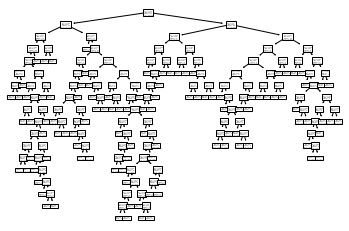

In [12]:
from sklearn import tree
tree.plot_tree(classifier)

In [13]:
tree.export_graphviz(classifier,
                     out_file="tree.dot",
                     feature_names=df.drop(columns=['Class label']).columns,
                     class_names=['0', '1'],
                     filled=True)

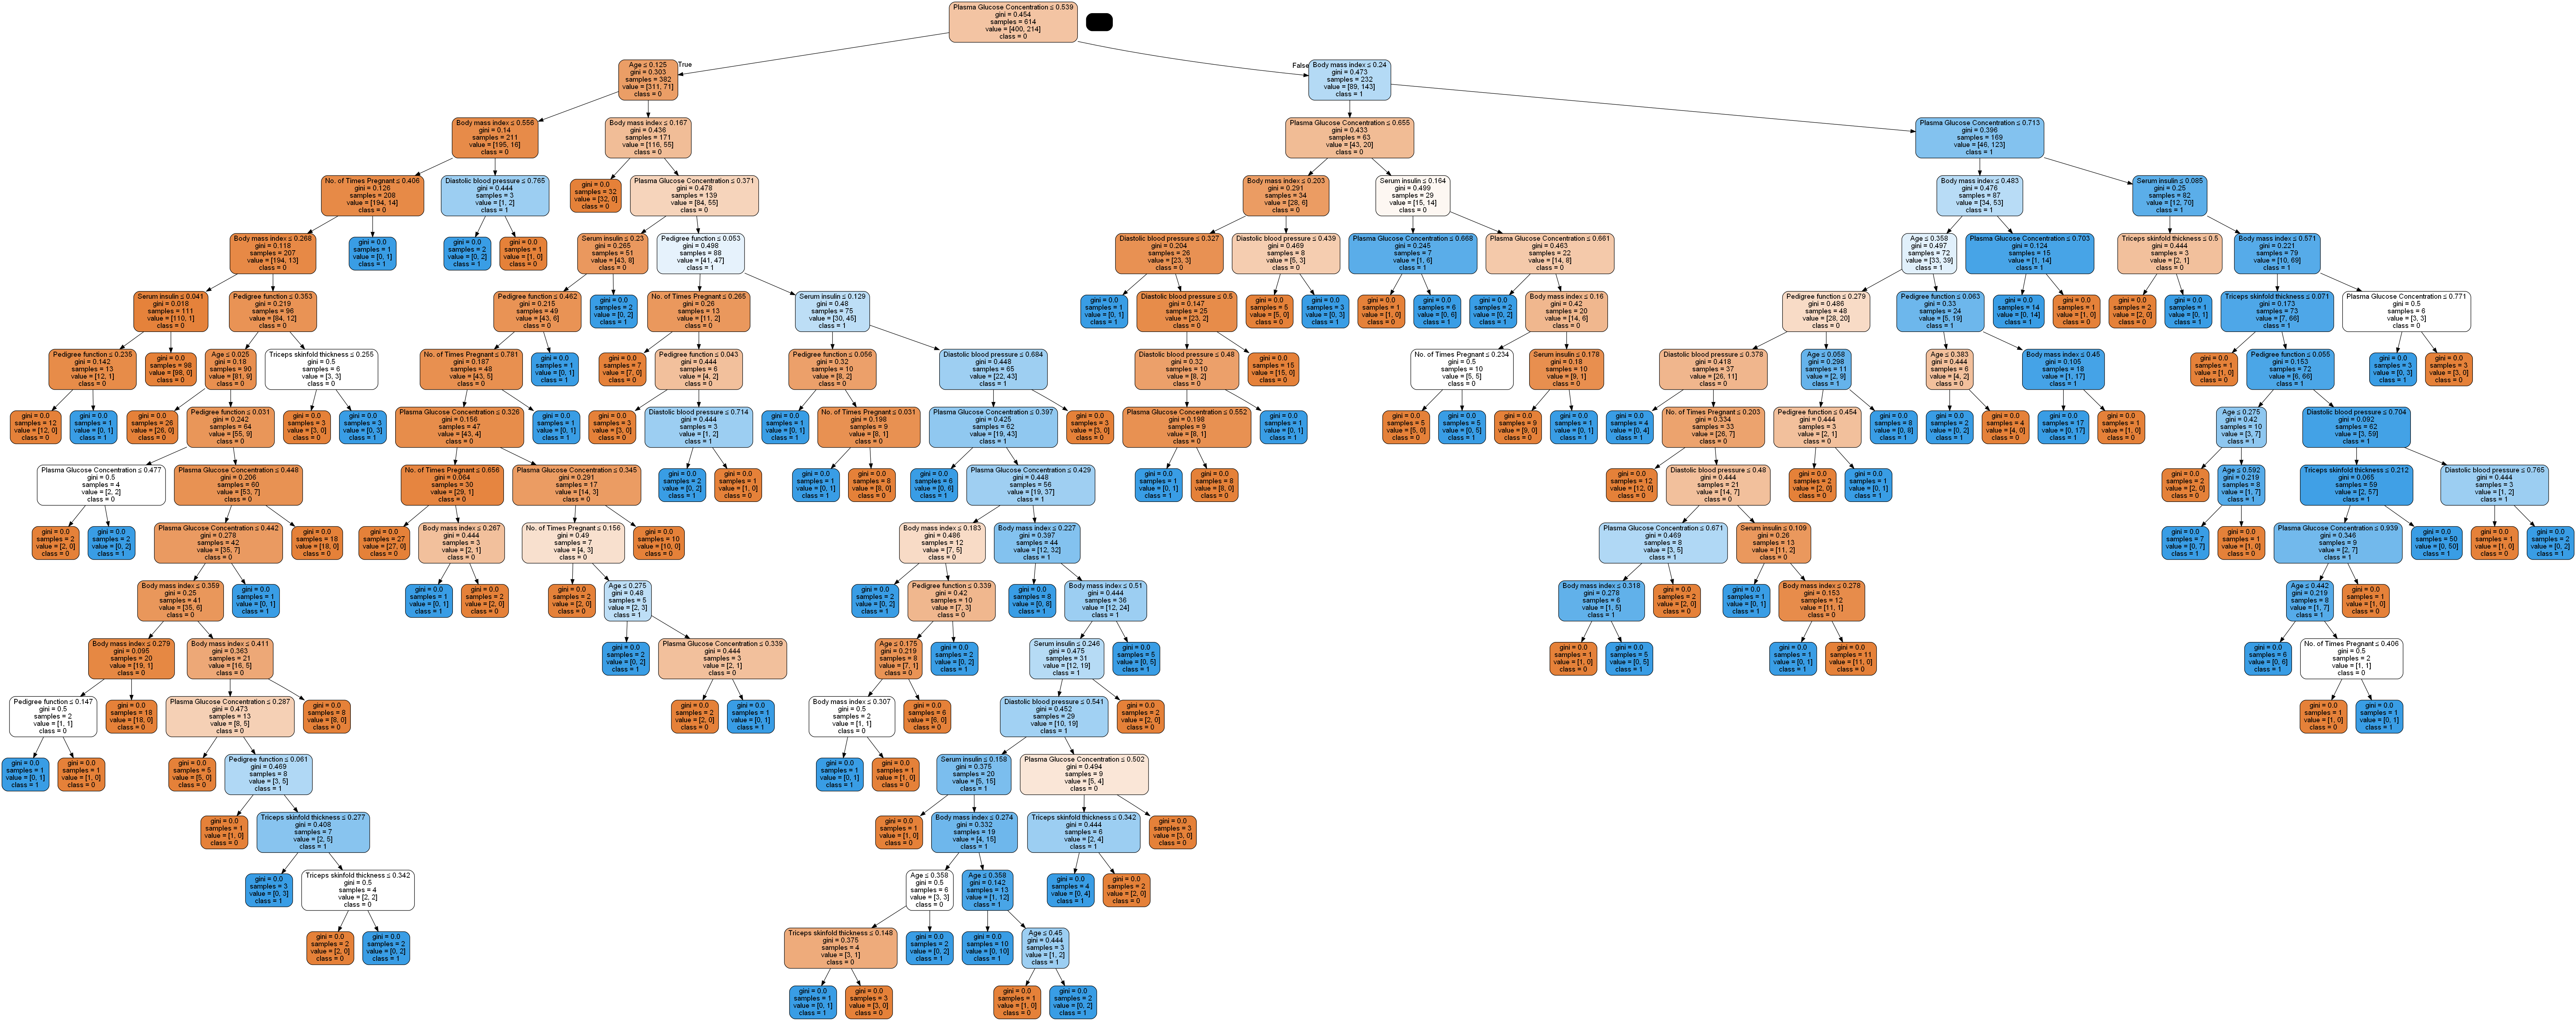

In [14]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=df.drop(columns=['Class label']).columns, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())